# NYT Digits
NYT Digits is a game in which a player attempts to create a sequence of arithmetic operations that yield a target value.

For example, you might be asked to reach 224 given these integers:

In [1]:
digits = [4, 7, 11, 15, 20, 25]
target = 224

and these operators:

In [2]:
from operator import *
def div(a, b):
    if a % b == 0:
        return a // b
    raise ValueError(f"{b} does not divide {a}")

def sub(a, b):
    if a > b:
        return a - b
    raise ValueError("all values must be positive")
    
operators = [add, sub, mul, div]

Once you use a pair of numbers, they are removed from your list and replaced with the output of the operation. If at any time your list contains the target value, you win.

Since this problem has optimal substructure (you can use the solution to a smaller version of the problem to a construct a solution to the larger problem), we can use a dynamic programming approach.

In [3]:
from itertools import combinations, product

def find_sequence(digits, operators, target, operations_sequence):
    if target in digits:
        return operations_sequence
    for op, (a, b) in product(operators, combinations(digits, 2)):
        try:
            result = op(a, b)
        except (ValueError, ArithmeticError):
            continue
        new_digits = digits.copy()
        new_digits.remove(a)
        new_digits.remove(b)
        new_digits.append(result)
        new_seq = operations_sequence.copy()
        new_seq.append(f"{a} {op.__name__} {b} = {result}")
        final_seq = find_sequence(new_digits, operators, target, new_seq)
        if final_seq is not None:
            return final_seq

In [4]:
find_sequence(digits, operators, target, [])

['4 add 7 = 11',
 '11 add 20 = 31',
 '25 add 31 = 56',
 '15 sub 11 = 4',
 '56 mul 4 = 224']

In [5]:
find_sequence([5, 7, 8, 9, 15, 20], operators, 341, [])

['7 add 15 = 22', '20 add 22 = 42', '8 mul 42 = 336', '5 add 336 = 341']

In [6]:
find_sequence([3, 9, 13, 19, 20, 23], operators, 445, [])

['3 add 9 = 12', '20 sub 12 = 8', '19 mul 23 = 437', '8 add 437 = 445']

I'm now curious how many different targets we can reach with the same set of numbers.

In [7]:
def seq_len(target):
    seq = find_sequence(digits, operators, target, [])
    return len(seq) if seq else None
for t in range(1, 50):
    print(t, seq_len(t))

1 4
2 5
3 5
4 None
5 4
6 4
7 None
8 5
9 4
10 5
11 None
12 4
13 4
14 4
15 None
16 4
17 4
18 4
19 5
20 None
21 4
22 2
23 4
24 4
25 None
26 2
27 4
28 4
29 4
30 5
31 3
32 5
33 4
34 4
35 4
36 4
37 4
38 5
39 4
40 4
41 5
42 5
43 5
44 4
45 3
46 3
47 4
48 5
49 4


In [8]:
import pandas as pd
seq_lengths = pd.Series({t: seq_len(t) for t in range(1000)})


<Axes: >

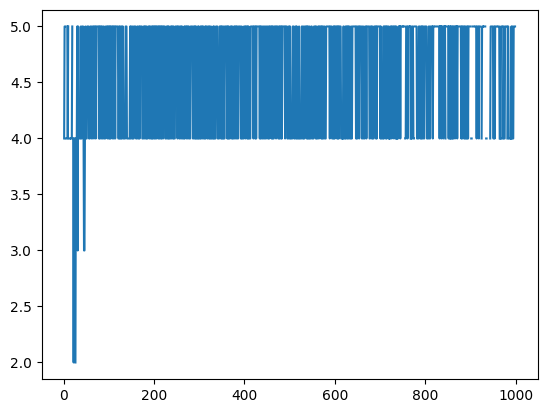

In [9]:
seq_lengths.plot()

cool